## Sentiment Analysis in Financial Markets
### Exploratory Data Analysis

Analyze news articles, financial reports, or social media to gauge market sentiment. This project would involve natural language processing (NLP) techniques to understand how sentiment affects stock prices.

### Stocks to focus on 

- Tesla (Tsla)

- Apple Inc. (AAPL)

- Amazon.com Inc. (AMZN)

- Alphabet Inc. (GOOGL)

- Microsoft Corporation (MSFT)

- Facebook, Inc. (META)

- JPMorgan Chase & Co. (JPM)

- NVIDIA Corporation (NVDA)


### Stock Market History Data

In [2]:
import yfinance as yf
import pandas as pd

In [23]:
tickers = ['Tsla','AAPL', 'MSFT', 'GOOG', 'AMZN']  # List of tickers  add more later
data = yf.download(tickers, start='2010-01-01', end='2024-01-01', group_by='ticker')
data.to_csv('data/stocks/df_tsla.csv')
data.head()

[*********************100%%**********************]  5 of 5 completed


TSLA                                       MSFT             \
           Open High Low Close Adj Close Volume       Open       High   
Date                                                                    
2010-01-04  NaN  NaN NaN   NaN       NaN    NaN  30.620001  31.100000   
2010-01-05  NaN  NaN NaN   NaN       NaN    NaN  30.850000  31.100000   
2010-01-06  NaN  NaN NaN   NaN       NaN    NaN  30.879999  31.080000   
2010-01-07  NaN  NaN NaN   NaN       NaN    NaN  30.629999  30.700001   
2010-01-08  NaN  NaN NaN   NaN       NaN    NaN  30.280001  30.879999   

                                  ...      AAPL                      \
                  Low      Close  ...       Low     Close Adj Close   
Date                              ...                                 
2010-01-04  30.590000  30.950001  ...  7.585000  7.643214  6.478997   
2010-01-05  30.639999  30.959999  ...  7.616071  7.656429  6.490199   
2010-01-06  30.520000  30.770000  ...  7.526786  7.534643  6.386966   
2010-01-07  30.190001  30.450001  ...  7.466071  7.520714  6.375155   
2010-01-08  30.240000  30.660000  ...  7.466429  7.570714  6.417540   

                         AMZN                                               
               Volume    Open    High     Low   Close Adj Close     Volume  
Date                                                                        
2010-01-04  493729600  6.8125  6.8305  6.6570  6.6950    6.6950  151998000  
2010-01-05  601904800  6.6715  6.7740  6.5905  6.7345    6.7345  177038000  
2010-01-06  552160000  6.7300  6.7365  6.5825  6.6125    6.6125  143576000  
2010-01-07  477131200  6.6005  6.6160  6.4400  6.5000    6.5000  220604000  
2010-01-08  447610800  6.5280  6.6840  6.4515  6.6760    6.6760  196610000  

[5 rows x 30 columns]

In [24]:
import pandas as pd



# Convert Date to datetime type and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate Daily Price Change and Percentage Change for each stock
for stock in ['MSFT', 'AMZN']:  # Add other stocks as needed
    data[f'{stock}_Price_Change'] = data[f'{stock}_Close'].diff()
    data[f'{stock}_Pct_Change'] = data[f'{stock}_Close'].pct_change() * 100

# Calculate Historical Volatility (e.g., 21-day rolling standard deviation of daily returns)
window = 21  # Example for a 21-day rolling window
for stock in ['MSFT', 'AMZN']:
    data[f'{stock}_Volatility'] = data[f'{stock}_Pct_Change'].rolling(window).std()

# Calculate Average Trading Volume over a period (e.g., 30 days)
window = 30  # Example for a 30-day rolling window
for stock in ['MSFT', 'AMZN']:
    data[f'{stock}_Avg_Volume'] = data[f'{stock}_Volume'].rolling(window).mean()

# Display the DataFrame with the new calculations
data


KeyError: 'Date'

### Textual data

In [7]:
df=pd.read_csv('data/textual/df.csv', sep=",")
df = df[['url', 'softTitle','title','date', 'author/1', 'description', 'keywords', 'text']]
df = df.rename(columns={'author/1': 'author' })

C:\Users\ethan\AppData\Local\Temp\ipykernel_24924\379255341.py:1: DtypeWarning: Columns (94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/textual/df.csv', sep=",")


In [16]:
start_date = '2010-01-01'
end_date = '2024-01-01'
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
df

,url,softTitle,title,date,author,description,keywords,text
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15 05:00:00+00:00,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,The best credit cards for building credit of J...,2019-10-29 15:24:00+00:00,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,"Select: Credit Cards,Select_Monetized,Credit c...",If you lack a credit history or have poor cred...
2,https://www.cnbc.com/select/best-cash-back-cre...,The best cash-back credit cards of January 2024,The best cash-back credit cards of January 2024,2019-10-15 05:00:00+00:00,"Alexandria White,Jason Stauffer",We analyzed 50 of the most popular cash-back c...,"Select: Credit Cards,Consumer spending,Persona...",Who's this for? The Citi Double Cash® Card is ...
3,https://www.cnbc.com/select/personal-loan-lend...,Do you need a large personal loan? These lende...,Do you need a large personal loan? These lende...,2022-05-06 19:12:25+00:00,Jasmin Suknanan,Select analyzed key factors like interest rate...,"Select_Monetized,Consumer spending,Personal fi...",Personal loans are a common way to pay for lar...
4,https://www.cnbc.com/select/best-credit-card-s...,The best credit card sign-up bonuses of Januar...,The best credit card sign-up bonuses of Januar...,2019-11-12 19:30:46+00:00,"Elizabeth Gravier,Alexandria White",We analyzed the most popular credit cards avai...,"Select: Credit Cards,Consumer spending,Persona...",Terms apply to American Express benefits and o...
...,...,...,...,...,...,...,...,...
9998,https://www.cnbc.com/2023/08/14/prepare-for-vo...,"Don’t be ‘complacent’ about volatility, warns ...","Don’t be ‘complacent’ about volatility, warns ...",2023-08-14 16:33:35+00:00,"Kate Dore, CFP®",Even if there's a soft landing for the economy...,"Financial consulting,Personal finance,Breaking...",Glassman said it's possible the soft landing m...
9999,https://www.cnbc.com/2021/11/20/4-year-end-mov...,4 year-end moves to slash your cryptocurrency ...,4 year-end moves to slash your cryptocurrency ...,2021-11-20 14:00:01+00:00,"Kate Dore, CFP®","As the year end approaches, there are still wa...","Personal taxes,United States House of Represen...",One of the biggest challenges for cryptocurren...
10000,https://www.cnbc.com/2021/10/29/build-back-bet...,Build Back Better Act would close tax loophole...,Build Back Better Act would close tax loophole...,2021-10-29 16:37:29+00:00,Greg Iacurci,"Bitcoin, ethereum, dogecoin and other cryptocu...","Joe Biden,Congress,Legislation,Politics,Social...",Proposed legislation unveiled Thursday as part...
10001,https://www.cnbc.com/2021/11/22/how-to-maximiz...,How to maximize year-end tax planning after a ...,How to maximize year-end tax planning after a ...,2021-11-22 13:00:01+00:00,"Kate Dore, CFP®",Whether you’re grappling with a job loss or ju...,"Jobs,Baby Boomers,U.S. Economy,Social issues,P...",Someone leaving the workforce through retireme...


In [17]:
df.head(2)

,url,softTitle,title,date,author,description,keywords,text
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15 05:00:00+00:00,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,The best credit cards for building credit of J...,2019-10-29 15:24:00+00:00,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,"Select: Credit Cards,Select_Monetized,Credit c...",If you lack a credit history or have poor cred...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9770 entries, 0 to 10002
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   url          9770 non-null   object             
 1   softTitle    9770 non-null   object             
 2   title        9770 non-null   object             
 3   date         9770 non-null   datetime64[ns, UTC]
 4   author       9565 non-null   object             
 5   description  9746 non-null   object             
 6   keywords     9362 non-null   object             
 7   text         9770 non-null   object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 687.0+ KB


In [19]:
# Convert date strings to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the date and count the number of articles per year
articles_per_year = df['date'].dt.year.value_counts().sort_index()
articles_per_year

date
2010       1
2011       3
2012       5
2013       5
2014       4
2015      46
2016     142
2017     231
2018     396
2019     658
2020    1243
2021    1364
2022    2192
2023    3480
Name: count, dtype: int64

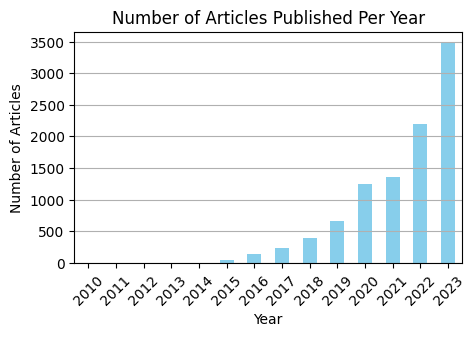

In [20]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(5, 3))
articles_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()
